# Classification using  Logistic Regression and scikit-learn 

a) Import the data, use all three class labels,  and split the data into a training data set and 
a test data set. 

In [5]:
# Importing data 

#from sklearn import __version__ as sklearn_version
#from distutils.version import LooseVersion

#if LooseVersion(sklearn_version) < LooseVersion('0.18'):
#    raise ValueError('Please use scikit-learn 0.18 or newer')

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
#print(X,y)

print('Class labels:', np.unique(y))

# Splitting data into 70% training and 30% test data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

# Standardizing the features:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


b) Below the LR class is defined and the classifier lrgd is computed.  There is no 
regularization yet. Study again the behavior of the cost function and the decision
regions for the training set when only two class labels are considered. 

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test=False, resolution=0.02, X_test=None):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    facecolor='black')

    # highlight test samples
    if test:
        # plot all samples

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='black', 
                    facecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')



class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def evaluate(self,X_test,y):
        output=np.where(self.net_input(X_test) >= 0.0, 1, 0)
        accuracy=np.sum(np.equal(output,y))/y.shape[0]
        return accuracy
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)





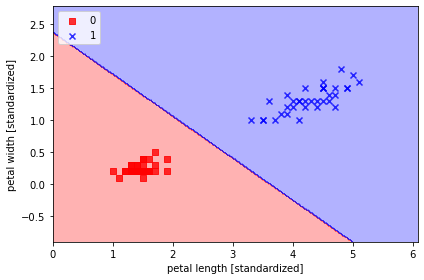

In [7]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
#print(y_train_01_subset) 

lrgd = LogisticRegressionGD(eta=0.05, n_iter=10, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [8]:
X_test_01_subset = X_test[(y_test == 0) | (y_test == 1)]
y_test_01_subset = y_test[(y_test == 0) | (y_test == 1)]
#print(X_test_01_subset) 

y_model = lrgd.predict(X_test_01_subset)
accuracy=lrgd.evaluate(X_test_01_subset,y_test_01_subset)
print(accuracy)

1.0


Solution exercise b: Looking at the plot you can notice that for a number of epochs lower than 7 the model is clearly not able to properly classify the test data. For a number of epochs equal to 8 we already achieve a 100% accuracy on the test data. If we further increase the number of epochs the performances obviously don't improve. Looking at the decision boundaries we can clearly see that for a number of epochs lower than 7 the model is not able to properly divide the test data. 

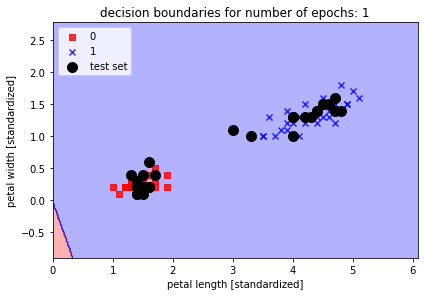

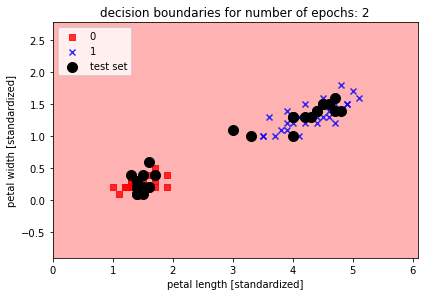

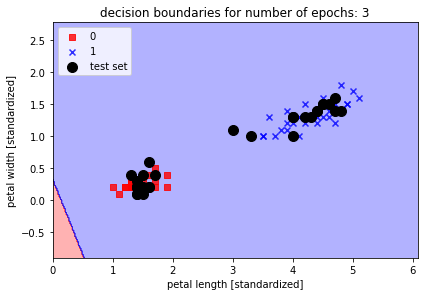

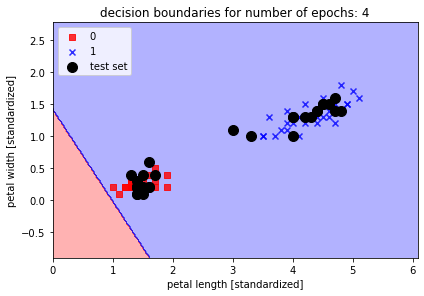

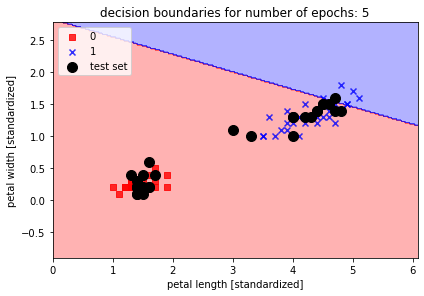

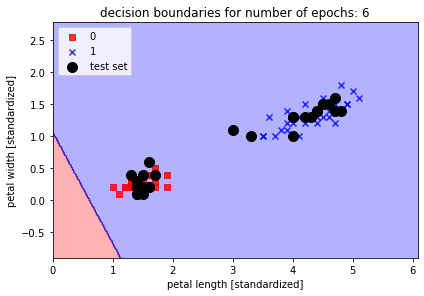

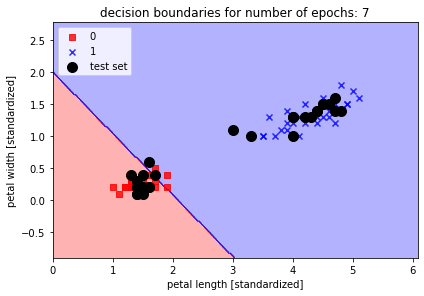

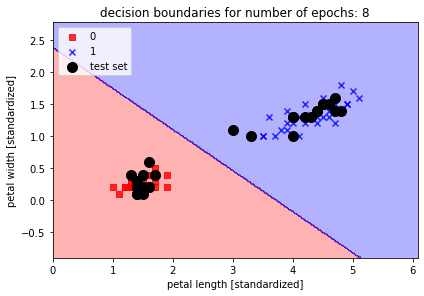

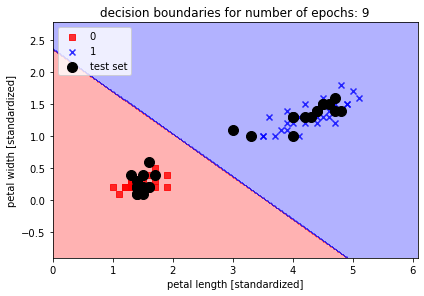

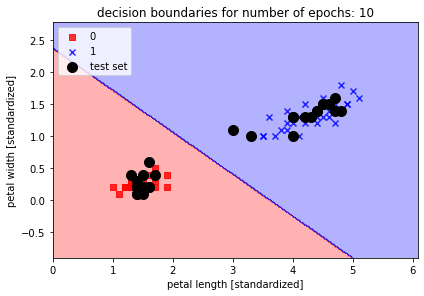

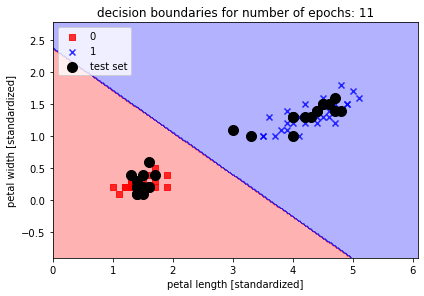

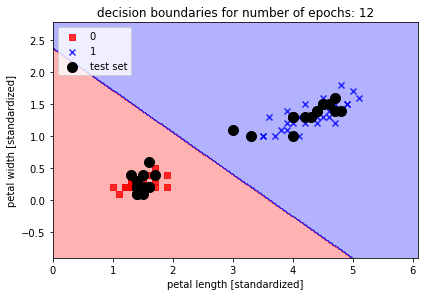

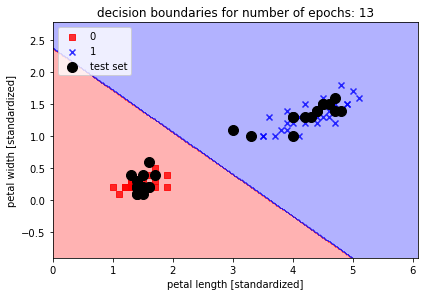

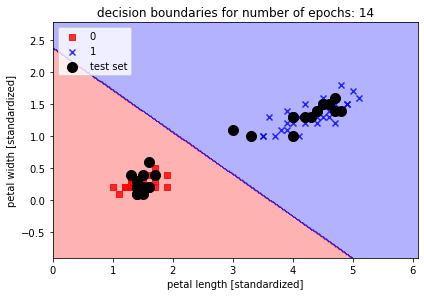

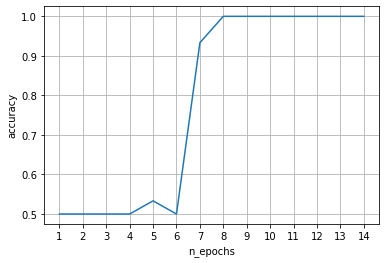

In [20]:
n_epochs=[]
accuracies=[]

for epochs in np.arange(1,15,1):
    n_epochs.append(epochs)
    lrgd = LogisticRegressionGD(eta=0.05, n_iter=epochs, random_state=1)
    lrgd.fit(X_train_01_subset,
         y_train_01_subset)
    accuracy=lrgd.evaluate(X_test_01_subset,y_test_01_subset)
    accuracies.append(accuracy)
    plot_decision_regions(X_train_01_subset, y_train_01_subset,
                      classifier=lrgd,test=True,X_test=X_test_01_subset)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title("decision boundaries for number of epochs: {}".format(epochs))
    plt.show()

fig=plt.figure()
plt.plot(n_epochs,accuracies)
plt.xlabel("n_epochs")
plt.xticks(n_epochs)
plt.ylabel("accuracy")
plt.grid()
plt.show()
    

Solution exercise d: For a learning rate lower that 0.01, 10 epochs are not enough for the model to converge to a good solution. Again as in exercise b we can plot the decision boundaries to clearly visualize that for a learning rate lower than 0.01 and a number of epochs equals to 10 the model is not able to properly separate the test data. 

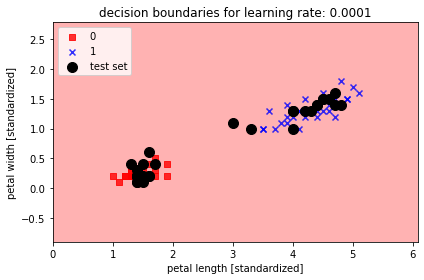

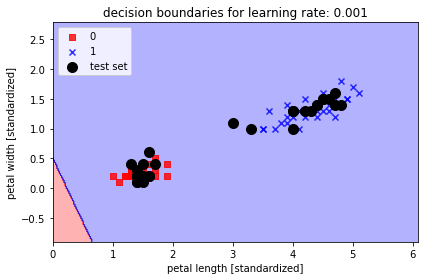

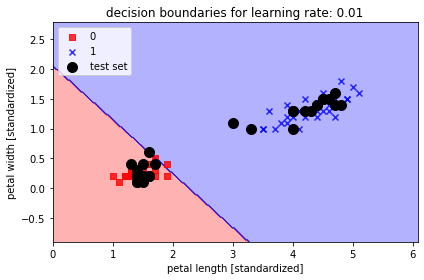

/var/folders/d_/y_gtn4hn6px65096zwc9qrnr0000gp/T/ipykernel_4277/2254253811.py:104: RuntimeWarning: divide by zero encountered in log
  cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))


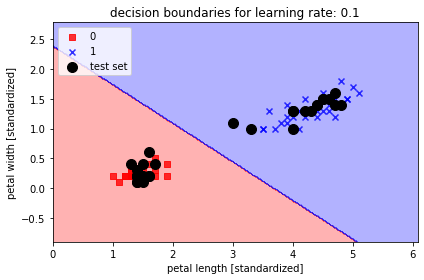

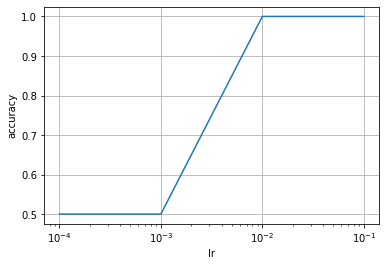

In [22]:
lr_list=[0.0001,0.001,0.01,0.1]
accuracies=[]

for lr in lr_list:
    lrgd = LogisticRegressionGD(eta=lr, n_iter=10, random_state=1)
    lrgd.fit(X_train_01_subset,
         y_train_01_subset)
    accuracy=lrgd.evaluate(X_test_01_subset,y_test_01_subset)
    accuracies.append(accuracy)
    plot_decision_regions(X_train_01_subset, y_train_01_subset,
                      classifier=lrgd,test=True,X_test=X_test_01_subset)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.title("decision boundaries for learning rate: {}".format(lr))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

fig=plt.figure()
plt.plot(lr_list,accuracies)
plt.xlabel("lr")
plt.xticks(lr_list)
plt.ylabel("accuracy")
plt.xscale('log')
plt.grid()
plt.show()

To include also the regularization term we have used the sklearn function sklearn.linear_model.LogisticRegression from the sklearn library.

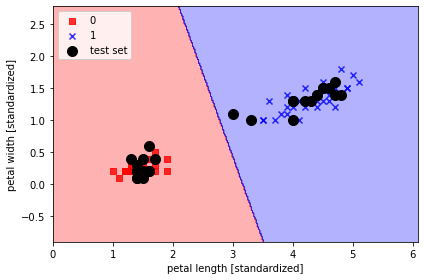

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.001,random_state=1)
lr.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X_train_01_subset, y_train_01_subset,
                      classifier=lr,test=True,X_test=X_test_01_subset)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

sr=lr.predict_proba(X_test_01_subset)
nmax=np.argmax(sr, axis=1)

#determine error 

print(nmax-y_test_01_subset)

#determine error 

d) Finally, study the effect of the regularization constant C on the results. Larger is the contribution of the regularization term in the loss function smaller will be the weights of our model (look at the plot in this cell). If the contribution of the regularization term is too large the model can be too simple to properly classify our data (underfitting).

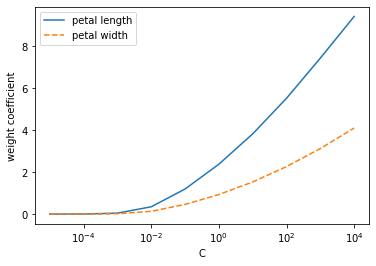

In [24]:
### Tackling overfitting via regularization

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_01_subset, y_train_01_subset)
    weights.append(lr.coef_[0])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

Solution exercise c: Looking at the last plot you can notice that for a regularization constant lower than 1^(-4) the model is clearly not able to properly classify the test data (underfitting). This is even more clear if we plot the decision boundaries.

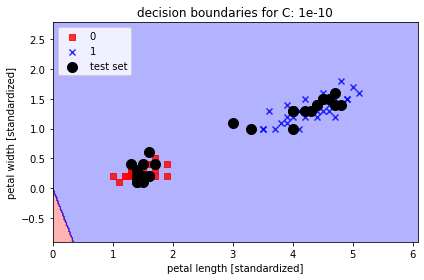

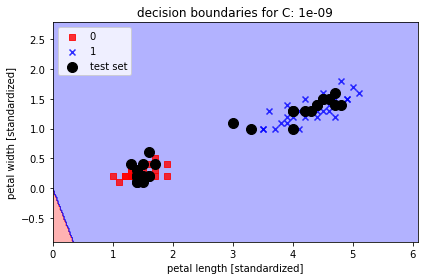

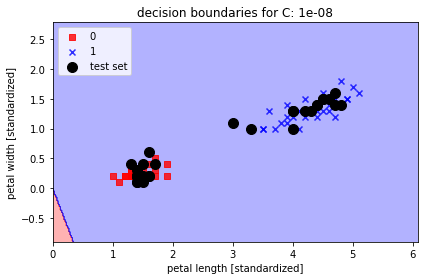

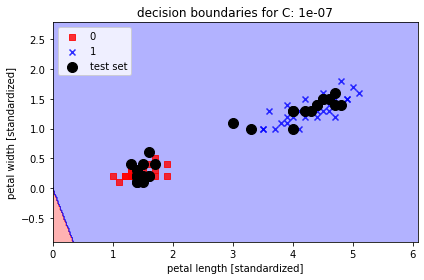

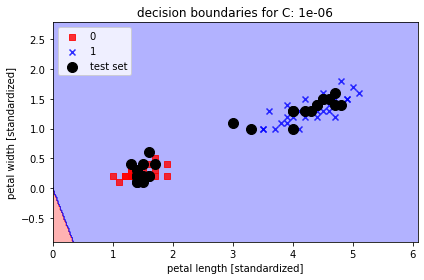

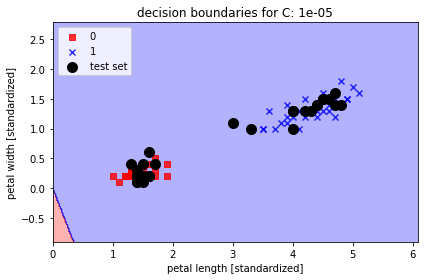

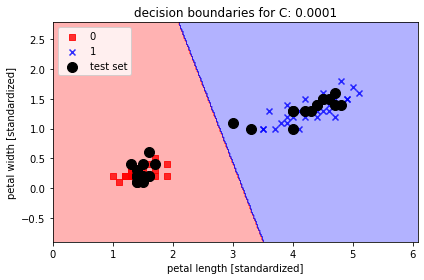

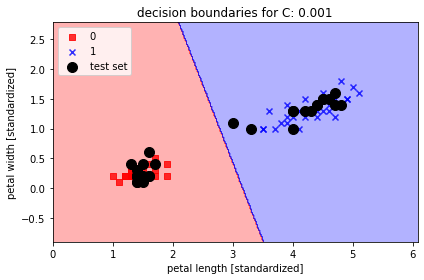

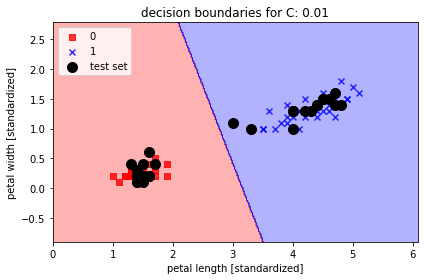

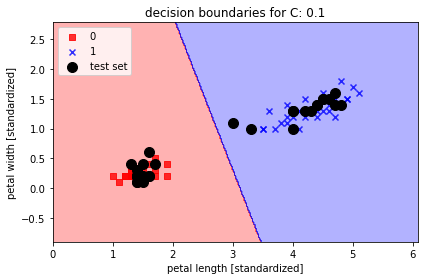

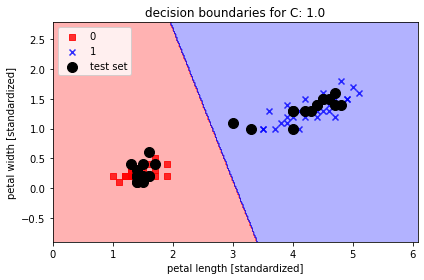

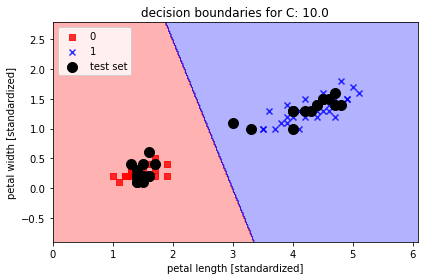

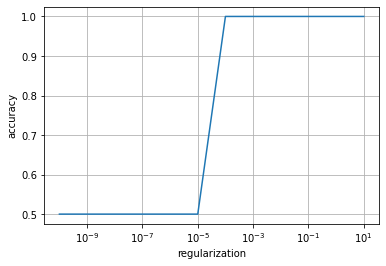

In [27]:

C_values=[]
accuracies=[]

for c in np.arange(-10 , 2):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_01_subset, y_train_01_subset)
    plot_decision_regions(X_train_01_subset, y_train_01_subset,
                      classifier=lr,test=True,X_test=X_test_01_subset)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.title("decision boundaries for C: {}".format(10.**c))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    C_values.append(10.**c)
    accuracies.append(lr.score(X_test_01_subset,y_test_01_subset))

fig=plt.figure()
plt.plot(C_values,accuracies)
plt.xlabel("regularization")
plt.xticks(C_values)
plt.ylabel("accuracy")
plt.grid()
plt.xscale('log')
plt.show()
    
    